# Assignment Sheet 6:  Regularization methods in Machine learning and their application in Feedforward neural networks  (deadline: 16 Dec, 23:59)

### General Regularization methods in ML $~$ (5 points)

**Goal:** Study the effects of **L2** and **L1** regularization on the weights used for modelling the data.

***Ridge regression*** is very similar to least squares, except that the weights are estimated by minimizing a slightly different quantity. In particular, the ridge regression co-efficient estimates $\mathbf{W_{ridge}}$ are the values that minimize, 

$$\mathbf{J(W) ~~=~~ \big|\big|~Y-XW~\big|\big|_{2}^2 ~+~\lambda~ \big|\big|~W~\big|\big|_{2}^2}$$ 

where,

$\mathbf{\lambda>0}$ is the regularizer,

**X** is the design matrix,

$\mathbf{W}$ is the weight vector and

**Y** represents the responses.

***Ridge regression*** seeks weight estimate $W^{Ridge}$ that fit the data well by minimizing the squared error $~$ $\mathbf{||~Y-XW~||^2}$ (which was also the linear regression cost function).
However, the second term, $\mathbf{||~W~||^2}$, called a ***shrinkage penalty*** is small when $\mathbf{W}$, i.e., $(w_1, w_2, ..., w_d)^T$ are close to zero. Thus, it has the effect of shrinking the estimates of $w_i$ towards zero.

The regularizer $\mathbf{\lambda}$ serves to control the relative impact of these two terms on the regression weight estimates. when $\mathbf{\lambda=0}$, the penalty term has no effect, and ridge regression will produce the least squares estimates. However, as $\mathbf{\lambda \rightarrow \infty}$, the impact of the shrinkage penalty grows and the ridge regression weight estimates will approach zero. Unlike least squares, which generates only one set of weight estimates, ridge regression will produce a different set of weight estimates, $\mathbf{W_{\lambda}^{Ridge}}$, for each value of $\mathbf{\lambda}$. Hence, selecting a good value of $\mathbf{\lambda}$ is critical.

$1.$ **Plot the magnitude of each weight in $\mathbf{W^{Ridge}}$ vs $\mathbf{\lambda}$ and explain how the regularizer $\mathbf{\lambda}$ affects the Ridge weights $\mathbf{W^{Ridge}}$.** $~$ ($2.5$ points)

Download the dataset, **data.csv**, from the NNIA piazza page.

In [2]:
# Load libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.linear_model import Ridge, Lasso

%matplotlib inline

In [3]:
# Read data
# TODO Implement
data = pd.read_csv('data.csv',sep=',')
# Read 'Salary' as your response/dependent variable
# TODO Implement
Y = data['Salary']
# Drop the column with the dependent variable 'Salary'
X = data.drop(['Salary'],axis=1)
X = X.drop(['Player'],axis=1)
X = scale(X,axis=1)
Y = scale(Y)
#print("Y",Y)
#print(X)

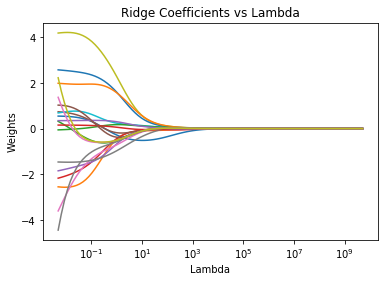

In [4]:
# Initialize values for the alphas
lamdas = 10**np.linspace(10,-2,100)*0.5
#print(lamdas)
# Create a Ridge Object that performs ridge regression
# TODO Implement
ridge_reg = Ridge()
# Create list to hold ridge weights
# TODO Implement
ridge_wts = []
# Iterate over all lamdas, performing data fitting with ridge regression 
# and find the corresponding co-efficients
#TODO Implement
for l in lamdas:
    ridge_reg.set_params(alpha=l)
    ridge_reg.fit(X,Y);
    ridge_wts.append(ridge_reg.coef_)
# Generate the plot
# TODO Implement
ax = plt.gca();
ax.plot(lamdas, ridge_wts);
ax.set_xscale('log');
plt.axis('tight');

# Name the plot
# TODO Implement
plt.xlabel('Lambda')
plt.ylabel('Weights')
plt.title('Ridge Coefficients vs Lambda');

(0.001255943215754791,
 19905358527.674763,
 -1.579038006067276,
 2.0555975258350374)

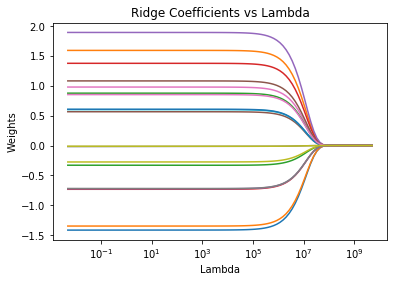

In [5]:
num_features = X.shape[1]
lr = 1 * 10**(-10)
#print(num_features)
# Now generate the same plot as above using Tensorflow
# for the same set of lambdas
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
lmb = tf.placeholder(tf.float32)
init_wts = tf.random_normal(shape=[num_features,1])

weights = tf.Variable(init_wts)


w_sq = tf.square(weights)

ridge_loss = tf.multiply(lmb, tf.reduce_sum(w_sq))
mse = tf.reduce_sum(tf.square(y - tf.matmul(x,weights)))

cost = tf.add(mse, ridge_loss)

init = tf.global_variables_initializer()

#der = tf.gradients(cost,weights)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
step = optimizer.minimize(cost)


wght_lst = []
#print(X)
#print("SHAPE:",Y.shape)
Y_1 = Y[:,None]
#print("SHAPE:",Y_1.shape)
#for l in lamdas:
with tf.Session() as sess:
    sess.run(init)
    #print(np.shape(sess.run(w_sq)))
    #print(sess.run(weights))
    for l in lamdas[::-1]:
        for _ in range(100):
            sess.run(step,feed_dict={x:X,y:Y_1,lmb:l})
        wght_lst.append(sess.run(weights).flatten())
    #break
    
ax = plt.gca();
#print(wght_lst)
ax.plot(lamdas[::-1], wght_lst);
plt.xlabel('Lambda')
plt.ylabel('Weights')
plt.title('Ridge Coefficients vs Lambda');
ax.set_xscale('log')
plt.axis('tight')

$2$. Next we deal with **L1 regularization** for which the corresponding method is called **Lasso.** In Lasso, we minimize the function, 
$$\mathbf{J(W) ~~=~~ \big|\big|~Y-XW~\big|\big|_{2}^2 ~+~\lambda~ \big|\big|~W~\big|\big|_{1}}$$

**Plot the magnitude of each weight in $\mathbf{W^{Lasso}}$ vs $\mathbf{\lambda}$ and explain how the regularizer $\mathbf{\lambda}$ affects the Lasso weights $\mathbf{W^{Lasso}}$.** $~$ ($2.5$ points)

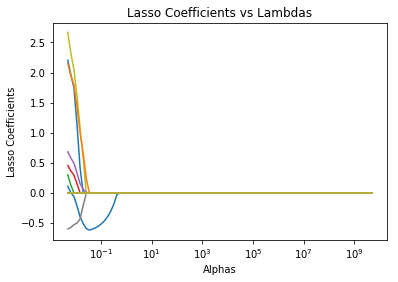

In [6]:
lamdas = 10**np.linspace(10,-2,100)*0.5
# Create a Lasso Object(set max_iter to 10000)
# TODO Implement
lasso_reg = Lasso(max_iter=10000)
# Create list to hold lasso weights
# TODO Implement
lasso_wts = []
# Iterate over all alphas, performing data fitting with Lasso
# and find the corresponding co-efficients
# TODO Implement
for lmb in lamdas:
    lasso_reg.set_params(alpha=lmb)
    lasso_reg.fit(X,Y);
    lasso_wts.append(lasso_reg.coef_)
# Generate the plot
# TODO Implement
ax = plt.gca();
ax.plot(lamdas, lasso_wts);
ax.set_xscale('log');
plt.axis('tight');

# Name the plot
# TODO Implement
plt.xlabel('Alphas')
plt.ylabel('Lasso Coefficients')
plt.title('Lasso Coefficients vs Lambdas');

(0.001255943215754791,
 19905358527.674763,
 -1.7087347984313965,
 1.759366798400879)

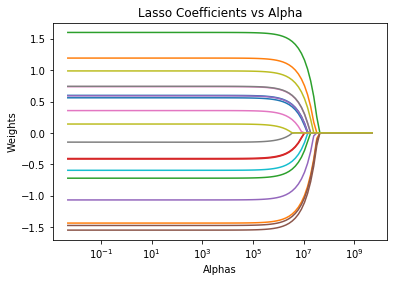

In [7]:
# Now generate the same plot as above using Tensorflow
# for the same set of lambdas
num_features = X.shape[1]
lr = 1 * 10**(-10)
#print(num_features)
# Now generate the same plot as above using Tensorflow
# for the same set of lambdas
lasso_x = tf.placeholder(tf.float32)
lasso_y = tf.placeholder(tf.float32)
lasso_lmb = tf.placeholder(tf.float32)
lasso_init_wts = tf.random_normal(shape=[num_features,1])

lasso_weights = tf.Variable(lasso_init_wts)


#w_sq = tf.square(weights)

lasso_loss = tf.multiply(lasso_lmb, tf.reduce_sum(tf.abs(lasso_weights)))
lasso_mse = tf.reduce_sum(tf.square(lasso_y - tf.matmul(lasso_x,lasso_weights)))

lasso_cost = tf.add(lasso_mse, lasso_loss)

lasso_init = tf.global_variables_initializer()

#der = tf.gradients(cost,weights)
lasso_optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
lasso_step = lasso_optimizer.minimize(lasso_cost)


lasso_wght_lst = []
#print(X)
#print("SHAPE:",Y.shape)
Y_1 = Y[:,None]
#print("SHAPE:",Y_1.shape)
#for l in lamdas:
with tf.Session() as lasso_sess:
    lasso_sess.run(lasso_init)
    #print(np.shape(sess.run(w_sq)))
    #print(sess.run(weights))
    for l in lamdas[::-1]:
        for _ in range(100):    
            lasso_sess.run(lasso_step,feed_dict={lasso_x:X,lasso_y:Y_1,lasso_lmb:l})
        lasso_wght_lst.append(lasso_sess.run(lasso_weights).flatten())
    #break
    
ax = plt.gca();
#print(wght_lst)
ax.plot(lamdas[::-1], lasso_wght_lst);
plt.xlabel('Alphas')
plt.ylabel('Weights')
plt.title('Lasso Coefficients vs Alpha');
ax.set_xscale('log')
plt.axis('tight')

**Comment on the plots generated in problems $1$ and $2$ respectively.**

For Lasso Regression (L1 regularization), the coefficients go to very low values much more quickly, and go to zero if alpha is very high. For Ridge Regression (L2 regularization), the ridge coefficients never go to zero, but go very low as the lambda value increases. Also the coefficients decay much slower compared to L1 regularization.

**Points: 5/5 **

### Understanding the Impact of norms in the  Regularizer $~$ (4 points)

$4$. Assume$~$ $\mathbf{x} \in R^2$, $(x_1, x_2) \in [-1, 1]\times[-1, 1]$. $~$ (2 points)

Now, draw the contour plots for $\mathbf{\big|\big|~x~\big|\big|_{0}}$, $\mathbf{\big|\big|~x~\big|\big|_{1}}$, $\mathbf{\big|\big|~x~\big|\big|_{2}}$ and $\mathbf{\big|\big|~x~\big|\big|_{\infty}}$ norms (consider all possible isolines in the given interval,i.e., ($[-1,1]\times[-1,1]$) and **explain** how you get the corresponding plot, i.e., provide the mathematical formula for getting the outermost isoline in each case.

(101, 101)
(10201, 2)
(10201,)
(101, 101)


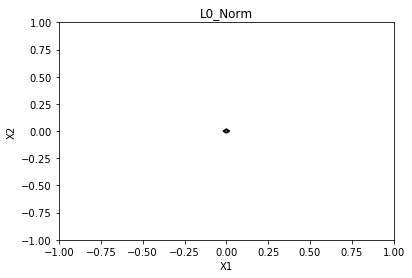

In [8]:

x1 = np.linspace(-1,1,101)
x2 = np.linspace(-1,1,101)

xx1,xx2 = np.meshgrid(x1,x2)
print(xx2.shape)
data = np.c_[xx1.ravel(), xx2.ravel()]
print(data.shape)
l0_norm = []
for i,j in data:
    #print(i,j)
    l0_norm.append((i!=0) + (j!=0))
#print(data)
l0_norm = np.array(l0_norm)
print(l0_norm.shape)
l0_norm = l0_norm.reshape(xx1.shape)
print(l0_norm.shape)

cplt = plt.contour(xx1,xx2,l0_norm,cmap=plt.cm.Greys)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('L0_Norm')
plt.clabel(cplt)
plt.show()

(101, 101)
(10201, 2)
(10201,)
(101, 101)


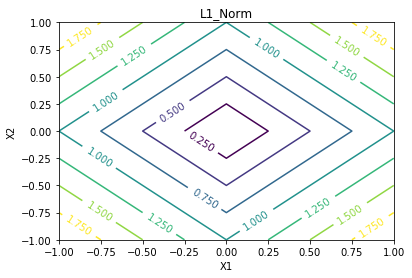

In [9]:
x1 = np.linspace(-1,1,101)
x2 = np.linspace(-1,1,101)

xx1,xx2 = np.meshgrid(x1,x2)
print(xx2.shape)
data = np.c_[xx1.ravel(), xx2.ravel()]
print(data.shape)
l1_norm = []
for i,j in data:
    #print(i,j)
    l1_norm.append(abs(i) + abs(j))
#print(data)
l1_norm = np.array(l1_norm)
print(l1_norm.shape)
l1_norm = l1_norm.reshape(xx1.shape)
print(l1_norm.shape)
cplt = plt.contour(xx1,xx2,l1_norm)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('L1_Norm')
plt.clabel(cplt)
plt.show()

(101, 101)
(10201, 2)
(10201,)
(101, 101)


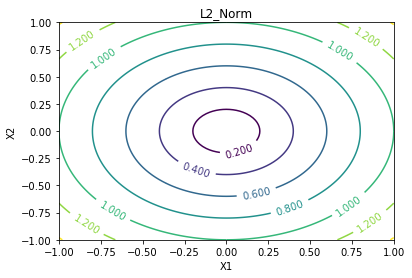

In [10]:
import math
x1 = np.linspace(-1,1,101)
x2 = np.linspace(-1,1,101)

xx1,xx2 = np.meshgrid(x1,x2)
print(xx2.shape)
data = np.c_[xx1.ravel(), xx2.ravel()]
print(data.shape)
l2_norm = []
for i,j in data:
    #print(i,j)
    l2_norm.append(math.sqrt(i**2 + j**2))
#print(data)
l2_norm = np.array(l2_norm)
print(l2_norm.shape)
l2_norm = l2_norm.reshape(xx1.shape)
print(l2_norm.shape)
cplt = plt.contour(xx1,xx2,l2_norm)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('L2_Norm')
plt.clabel(cplt)
plt.show()


(101, 101)
(10201, 2)
(10201,)
(101, 101)


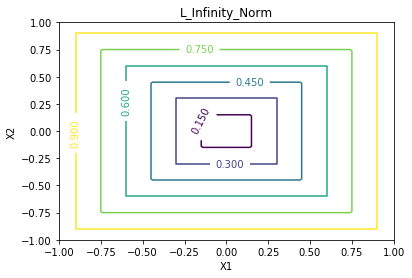

In [11]:
import math
x1 = np.linspace(-1,1,101)
x2 = np.linspace(-1,1,101)

xx1,xx2 = np.meshgrid(x1,x2)
print(xx2.shape)
data = np.c_[xx1.ravel(), xx2.ravel()]
print(data.shape)
linf_norm = []
for i,j in data:
    #print(i,j)
    linf_norm.append(max(abs(i),abs(j)))
#print(data)
linf_norm = np.array(linf_norm)
print(linf_norm.shape)
linf_norm = linf_norm.reshape(xx1.shape)
print(linf_norm.shape)
cplt = plt.contour(xx1,xx2,linf_norm)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('L_Infinity_Norm')
plt.clabel(cplt)
plt.show()

$4$. Answer:

The countour plots for $\mathbf{\big|\big|~x~\big|\big|_{0}}$, $\mathbf{\big|\big|~x~\big|\big|_{1}}$, $\mathbf{\big|\big|~x~\big|\big|_{2}}$ and $\mathbf{\big|\big|~x~\big|\big|_{\infty}}$ have been plotted using python below.

The equations for the outermost isoline in each case are as follows:

For $L_0$ norm,
\begin{equation}
\mathbf{\big|\big|~x~\big|\big|_{0}} = \text{number of non zero elements}(x_1 ,x_2)
\end{equation}


For $L_1$ norm,
\begin{equation}
\mathbf{\big|\big|~x~\big|\big|_{1}} = x_1 + x_2
\end{equation}

For $L_2$ norm,
\begin{equation}
\mathbf{\big|\big|~x~\big|\big|_{2}} = \sqrt{x_1^2 + x_2^2}
\end{equation}

For $L_{\infty}$ norm,
\begin{equation}
\mathbf{\big|\big|~x~\big|\big|_{\infty}} = \text{max} ( \big|x_1\big| , \big|x_2\big| )
\end{equation}


**Points: 2/2 **
> Good

$5$. Sketch the **Lasso** optimization function, $~$ $\mathbf{J(W) ~~=~~ \big|\big|~Y-XW~\big|\big|_{2}^2 ~+~\lambda~ \big|\big|~W~\big|\big|_{1}}$ $~$ in two dimensions. From this sketch try to explain why **Lasso** induces **sparsity.** $~$ (2 points)

In [12]:
from IPython.display import Image
Image(url='https://github.com/jojoayan1992/SaarlandUniversityNeuralNetworks/blob/master/NN%20Assignment%206_1.jpg?raw=true')

**Points: 2/2 **

### Getting to know Back-Propagation in details $~$ (3 points)

![Neural Network](https://github.com/mmarius/nnia-tutorial/blob/master/neural-net.png?raw=true)

We have a **Feedforward Neural network** with one **input layer**, one **hidden layer** and one **output layer.** The **hidden layer** and **output layer** use the sigmoid function, $\mathbf{\sigma(x) = \frac{1}{1+exp(-x)}}$, as **activation function.** Also note, that the network minimizes **Binary Cross Entropy loss**, given by, $$\mathbf{J = \sum -y\log(\hat{y}) - (1-y)\log(1-\hat{y})}$$

We consider the true class labels to be **binary**, i.e., either $0$ or $1$. 

**For the purpose of computing the derivatives of the loss/cost function consider the numerical values obtained by the network.**

**Input layer** consists of two nodes, $x_1$ and $x_2$ respectively. For our problem consider the following input,
$$\begin{bmatrix} x_1\\ x_2\\ \end{bmatrix} = \begin{bmatrix} -1\\ 1\\ \end{bmatrix}$$

**Hidden layer** is made up of 3 neurons and the corresponding matrix of weights is as given:
$$
\mathbf{W_{hidden}}
~=~
\begin{bmatrix} w_1^{1} & w_1^{2} & w_1^{3} \\ w_2^{1} & w_2^{2} & w_2^{3} \end{bmatrix}
~=~
\begin{bmatrix} 0.15 & -0.25 & 0.05\\ 0.20 & 0.10 & -0.15 \end{bmatrix}
$$

**Note:** Output of **Hidden layer** is given by, $~~$ $\mathbf{a=\sigma~(W_{hidden}^{T}x)}$

**Output layer** consists of one neuron, i.e., the **network** generates a single output. **For our problem, the true class label is $1$.**

The matrix corresponding to the **Output layer** is given by,
$$
\mathbf{W_{out}}
~=~
\begin{bmatrix} w_1\\w_2 \\w_3\end{bmatrix}
~=~
\begin{bmatrix} 0.20\\-0.35\\0.15 \end{bmatrix}
$$

**Note:** output from the **Output layer** is given by, $~$ $\mathbf{\hat{y} = \sigma~(W_{out}^Ta)}$

$6$. Execute the following sequence of operations and **show that Binary Cross Entropy loss is getting reduced, i.e., $ C^2 < C^1$** $~$ ($3$ points)

**Perform Forward-propagation to generate output** $\to$ **Compute loss or cost ($C^1$)** $\to$ **perform Back-propagation to compute the error** $\to$ **perform Gradient descent to update the weights** $\to$ **peform Forward-propagation again with updated weights** $\to$ **Compute loss or cost ($C^2$)**

**Note:**  $C^i$ denotes the loss or cost at the $i^{th}$ iteration, for performing Gradient descent consider a learning rate of $0.1$

In [14]:
Image(url='https://github.com/jojoayan1992/SaarlandUniversityNeuralNetworks/blob/master/NN%20Assignment%206_2_A.jpg?raw=true')

In [15]:
Image(url='https://github.com/jojoayan1992/SaarlandUniversityNeuralNetworks/blob/master/NN%20Assignment%206_3.jpg?raw=true')

In [16]:
Image(url='https://github.com/jojoayan1992/SaarlandUniversityNeuralNetworks/blob/master/NN%20Assignment%206_4.jpg?raw=true')

In [17]:
Image(url='https://github.com/jojoayan1992/SaarlandUniversityNeuralNetworks/blob/master/NN%20Assignment%206_5_A.jpg?raw=true')

**Points: 3/3 **
> Very good!

### Feed-forward Neural Network with L1 and L2 regularization $~$ (8 points)

In the following exercise you would build a **feed-forward network** from scratch using only **Numpy** in python. For this, you also have to implement **Back-propagation** in python. Additionally, this network should have the option of **L1 and L2 regularization** enabled within it.

Download **mnist** dataset from NNIA piazza page.

In [18]:
import os
import struct
import numpy as np
 
def load_mnist(path, kind='train'):
    """function for loading data"""
    labels_path = os.path.join(path, 
                               '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, 
                               '%s-images-idx3-ubyte' % kind)
        
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', 
                                 lbpath.read(8))
        labels = np.fromfile(lbpath, 
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", 
                                               imgpath.read(16))
        images = np.fromfile(imgpath, 
                             dtype=np.uint8).reshape(len(labels), 784)
 
    return images, labels

In [19]:
X_train, y_train = load_mnist('mnist/', kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))
print(X_train.shape)

Rows: 60000, columns: 784
(60000, 784)


In [20]:
X_test, y_test = load_mnist('mnist/', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Rows: 10000, columns: 784


In [21]:
def shuffle_train_data(X_train, Y_train):
    """called after each epoch"""
    perm = np.random.permutation(len(Y_train))
    Xtr_shuf = X_train[perm]
    Ytr_shuf = Y_train[perm]
    
    return Xtr_shuf, Ytr_shuf

In [22]:
import numpy as np
from scipy.special import expit

costs_list_all = []

class MLP(object):
    """ Feedforward neural network with a single hidden layer.

    Parameters
    ------------
    n_output : int
        Number of output units, should be equal to the
        number of unique class labels.
        
    n_features : int
        Number of features (dimensions) in the target dataset.
        Should be equal to the number of columns in the X array.
        
    n_hidden : int
        Number of hidden units.
        
    l1 : float
        Regularizer for L1-regularization.
        l1=0.0 implies no regularization
        
    l2 : float
        Lambda value for L2-regularization.
        l2=0.0 implies no regularization
        
    epochs : int
        Number of passes over the training set.
        
    eta : float (default: 0.001)
        Learning rate.
        
    decrease_const : float (default: 0.0)
        Decrease constant. Shrinks the learning rate
        after each epoch via eta / (1 + epoch*decrease_const)
        
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent circles.
        
    minibatches : int (default: 1)
        Divides training data into k minibatches for efficiency.
        
    random_state : int (default: None)
        Set random state for shuffling and initializing the weights.

    Attributes
    -----------
    cost_ : list
      Sum of squared errors after each epoch.

    """
    def __init__(self, n_output, n_features, n_hidden=30,
                 l1=0.0, l2=0.0, epochs=50, eta=0.001,
                 decrease_const=0.0, shuffle=True,
                 minibatches=1, random_state=None):
        
        #TODO Implement
        self.n_output = n_output
        self.n_features = n_features
        self.n_hidden = n_hidden
        self.l1 = l1
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta # learning rate
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        self.random_state = random_state
        self.cost_ = []
        self.weights1, self.weights2 = self.initialize_weights()

    def encode_labels(self, y, k):
        """Encode the labels using one-hot representation

        Parameters
        ------------
        y : y represents target values.

        Returns
        -----------
        onehot array

        """
        #TODO Implement
        arr = np.zeros((len(y),k))
        for i in range(len(y)):
            arr[i][y[i]] = 1
        return arr

    def initialize_weights(self):
        """Initialize using random numbers."""
        
        #TODO Implement
        rand = np.random.RandomState(seed=self.random_state)
        weights1 = rand.normal(size=(self.n_hidden,self.n_features+1)) # ADDING 1 FOR BIAS... 
        weights2 = rand.normal(size=(self.n_output,self.n_hidden+1)) # ... SAME HERE ...
        return weights1, weights2

    def sigmoid(self, z):
        """Compute sigmoid function
           Implement a stable version which 
           takes care of overflow and underflow.
        """
        
        #TODO Implement
        
        return expit(z)
        
    """def softmax(self, z):
    
        #TODO Implement
        
        m = np.amax(z,axis=1)
        m = m[:,np.newaxis]
        #print (np.exp(z-m))
        sums = np.sum(np.exp(z - m),axis=1)
        sums = sums[:,np.newaxis]
        return (np.exp(z - m) / sums)"""

    def sigmoid_gradient(self, z):
        """Compute gradient of the sigmoid function"""
        #NOT# We assume we are taking the z = sigmoid(x) as the input argument.
        #TODO Implement
        return (self.sigmoid(z) * (1 - self.sigmoid(z)))
        #NOT# So we return (sigmoid(x) * (1 - sigmoid(x))) which is (z*(1-z))
        #return (z * (1 - z))
        
    '''def softmax_gradient(self, z):
        
        I = np.eye(z.shape[0],z.shape[1])
        return self.softmax(z) * (I - self.softmax(z))'''

    def add_bias_unit(self, X, how='column'):
        """Add bias unit to array at index 0"""
        
        #TODO Implement
        if len(X.shape) > 1:
            le = X.shape[0]
            b = np.ones((le,1))
        else:
            l = 1
            b = np.ones(l)
        #b = np.ones()
        if how=='column':
            X = np.concatenate((b,X),axis=1)
        else:
            X = np.concatenate((b,X))
        
        return X

    def feedforward(self, X, w1, w2):
        """Compute feedforward step

        Parameters
        -----------
        X : array, shape = [n_samples, n_features]
            Input layer with original features.
        w1 : array, shape = [n_hidden_units, n_features]
            Weight matrix for input layer -> hidden layer.
        w2 : array, shape = [n_output_units, n_hidden_units]
            Weight matrix for hidden layer -> output layer.

        Returns
        ----------
        a1 : array,
            Input values with bias unit.
        z2 : array,
            Net input of hidden layer.
        a2 : array,
            Activation of hidden layer.
        z3 : array,
            Net input of output layer.
        a3 : array,
            Activation of output layer.

        """
        
        # TODO Implement
        a1 = self.add_bias_unit(X)
        #print("In Feed Forward: shape of a1:",a1.shape)
        #w1_bias = self.add_bias_unit(w1)
        z2 = np.matmul(a1, w1.transpose())
        #print("In Feed Forward: shape of z2:",z2.shape)
        a2 = self.sigmoid(z2)
        a2_bias = self.add_bias_unit(a2)
        #w2_bias = self.add_bias_unit(w2)
        z3 = np.matmul(a2_bias, w2.transpose())
        a3 = self.sigmoid(z3)
        # Output layer using softmax activation!
        #a3 = self.softmax(z3)
        #print("Our A3:",a3[0])
        return a1,z2,a2_bias,z3,a3

    def L2_reg(self, lambda_, w1, w2):
        """Compute L2-regularization cost"""
        
        #TODO Implement
        return (lambda_/2.0)*(np.sum(w1**2) + np.sum(w2**2))
        

    def L1_reg(self, lambda_, w1, w2):
        """Compute L1-regularization cost"""
        
        #TODO Implement
        return (lambda_)*(np.sum(abs(w1)) + np.sum(abs(w2)))
        
    def get_cost(self, y_enc, output, w1, w2):
        """Compute cost function.

        Parameters
        ----------
        y_enc : array, one-hot encoded class labels.
        
        output : array, Activation of the output layer (feedforward)
        
        w1 : array, Weight matrix for input layer -> hidden layer.
        w2 : array, Weight matrix for hidden layer -> output layer.

        Returns
        ---------
        cost : float, Regularized cost.

        """
        
        #TODO Implement
        regularizer_cost = 0
        #if self.l1 != 0.0:
        regularizer_cost += self.L1_reg(self.l1, w1, w2)
        #elif self.l2 != 0.0:
        regularizer_cost += self.L2_reg(self.l2, w1, w2)
        #mse = np.mean(np.square(y_enc - output))
        #J=∑−ylog(ŷ )−(1−y)log(1−ŷ )
        # Using binary cross entropy
        # CHANGE THIS... CHANGE TO SIMPLE CROSS ENTROPY... -SUMM(y.LOG(yhat))
        pred_cost = - np.sum((y_enc * np.log(output)) + ((1 - y_enc) * np.log(1 - output)))
        #pred_cost = -np.sum(y_enc * np.log(output))
        #pred_cost = -np.sum(y_enc * (output - np.log(np.sum(output,axis=1))))
        cost = pred_cost + regularizer_cost
        # Return cost/(no. of samples)
        return cost/y_enc.shape[0]

    def get_gradient(self, a1, a2, a3, z2, z3, y_enc, w1, w2):
        """ Compute gradient step using backpropagation.

        Parameters
        ------------
        a1 : array, Input values with bias unit.
        a2 : array, Activation of hidden layer.
        a3 : array, Activation of output layer.
        z2 : array, Net input of hidden layer.
        **z3 : array, Net input of output layer.
        y_enc : array, one-hot encoded class labels.
        w1 : array, Weight matrix for input layer -> hidden layer.
        w2 : array, Weight matrix for hidden layer -> output layer.

        Returns
        ---------
        grad1 : array, Gradient of the weight matrix w1.
        grad2 : array, Gradient of the weight matrix w2.

        """
        
        # backpropagation
        #TODO Implement
        #del3 = a3 - y_enc
        # CHANGE HERE TO ADD IN THE GRADIENT OF SOFTMAX... NOT SIGMOID
        del3 = self.sigmoid_gradient(z3) * (a3 - y_enc)
        # Now using the softmax gradient
        #del3 = self.softmax_gradient(z3) * (a3 - y_enc)
        #del3 = (a3 - y_enc)
        grad_2 = np.dot(del3.T, a2)
        
        z2 = self.add_bias_unit(z2)
        #print ("In get_gradient, z2 shape =",z2.shape)
        del2 = self.sigmoid_gradient(z2) * np.dot(del3, w2)
        # Get rid of bias
        del2 = del2[:,1:]
#         print ("In get_gradient, del2 shape = ",del2.shape)
#         print ("In get_gradient, del3 shape =",del3.shape)
#         print ("In get_gradient, w2 shape =",w2.shape)
#         print ("In get_gradient, w1 shape =",w1.shape)
#         print ("In get_gradient, a1 shape =",a1.shape)
        grad_1 = np.dot(del2.T, a1)

        # regularize
        #TODO Implement
        #if (self.l1 != 0):
        grad_2 += self.l1 * np.sign(w2)
        grad_1 += self.l1 * np.sign(w1)
        #elif (self.l2 != 0):
        grad_2 += self.l2 * w2
        grad_1 += self.l2 * w1
        return grad_1,grad_2

    def predict(self, X):
        """Predict class labels

        Parameters
        -----------
        X : array, Input layer with original features.

        Returns:
        ----------
        y_pred : array, Predicted class labels.

        """
        
        # TODO Implement
        a1,z2,a2,z3,a3 = self.feedforward(X, self.weights1, self.weights2)
        return np.argmax(a3,axis=1)
        
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data.

        Parameters
        -----------
        X : array, Input layer with original features.
        y : array, Target class labels.
        print_progress : bool, Prints the progress

        Returns:
        ----------
        self

        """
        learning_rate = self.eta
        num_batches = self.minibatches
        batch_size = len(X_train) // num_batches
        #TODO Implement
        for epoch in range(self.epochs):
            #print("Epoch:",epoch)
            if self.shuffle:
                train_X, train_Y = shuffle_train_data(X_train,y_train)            
            learning_rate = learning_rate / (1 + epoch*self.decrease_const)
            for b in range(num_batches):
                #print("Batch:",b)
                x_batch = train_X[b*batch_size:min(((b+1)*batch_size),len(X_train)),:]
                y_batch = train_Y[b*batch_size:min(((b+1)*batch_size),len(X_train))]
                # Encode the output
                #print("SHAPE...",y_batch.shape)
                y_enc = self.encode_labels(y_batch,self.n_output)
                #print("Actual...",y_enc[0])
                #print("Shape weights1:",self.weights1.shape)
                #print("Shape weights2:",self.weights2.shape)
                # Do forward feed of network
                #print("Calling feed forward")
                a1,z2,a2,z3,a3 = self.feedforward(x_batch,self.weights1,self.weights2)
                #print("Preds:",a3)
                # Calculate loss
                cost = self.get_cost(y_enc, a3, self.weights1, self.weights2)
                
                # Do backprop
                grad1, grad2 = self.get_gradient(a1, a2, a3, z2, z3, y_enc, self.weights1, self.weights2)
                
                # Do one step of gradient descent using the gradients
                self.weights1 -= learning_rate * grad1
                self.weights2 -= learning_rate * grad2
                
                # Store cost for the first plotting problem
                costs_list_all.append(cost)
                
            # Update cost_ list after each epoch
            y_enc_train = self.encode_labels(y_train,self.n_output)
            a1_train,z2_train,a2_train,z3_train,a3_train = self.feedforward(X_train,self.weights1,self.weights2)
            cost_train = self.get_cost(y_enc_train, a3_train, self.weights1, self.weights2)
            self.cost_.append(cost_train)
            
            if (print_progress) and ((epoch % 50) == 0 or epoch == self.epochs - 1):
                print ("Epoch:",epoch,"Cost:",self.cost_[-1])
            
            

        
        

In [23]:
nn = MLP(n_output=10, 
                  n_features=X_train.shape[1], 
                  n_hidden=50, 
                  l2=0.1, 
                  l1=0.0, 
                  epochs=1000, 
                  eta=0.001,
                  decrease_const=0.00001,
                  minibatches=50, 
                  shuffle=True,
                  random_state=1)

In [24]:
nn.fit(X_train, y_train, print_progress=True)

Epoch: 0 Cost: 6.51295949122
Epoch: 50 Cost: 1.6170962236
Epoch: 100 Cost: 0.754863826809
Epoch: 150 Cost: 0.622392703155
Epoch: 200 Cost: 0.552287592368
Epoch: 250 Cost: 0.50938978726
Epoch: 300 Cost: 0.462156242287
Epoch: 350 Cost: 0.434453738398
Epoch: 400 Cost: 0.414374426085
Epoch: 450 Cost: 0.385050120406
Epoch: 500 Cost: 0.369466209988
Epoch: 550 Cost: 0.349921374744
Epoch: 600 Cost: 0.339932372343
Epoch: 650 Cost: 0.334051159168
Epoch: 700 Cost: 0.333019028602
Epoch: 750 Cost: 0.332654594659
Epoch: 800 Cost: 0.332423622162
Epoch: 850 Cost: 0.332283039248
Epoch: 900 Cost: 0.332168225488
Epoch: 950 Cost: 0.332120966963
Epoch: 999 Cost: 0.33207846981


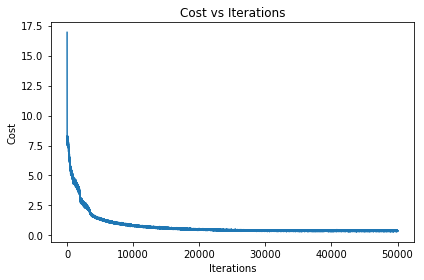

In [25]:
import matplotlib.pyplot as plt

# Plot the training error for every iteration
# in every epoch

# TODO Implement
#print (len(nn.cost_))
num_iters = nn.minibatches * nn.epochs
plt.plot(range(0,num_iters),costs_list_all)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.tight_layout()
plt.show()

1000


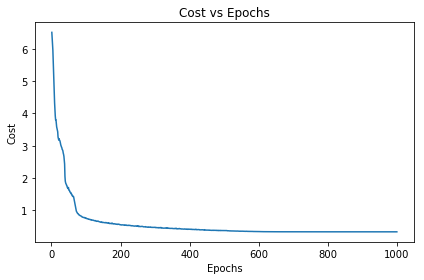

In [26]:
# Plot the training error in every epoch
# TODO Implement
print (len(nn.cost_))
plt.plot(range(1,nn.epochs+1), nn.cost_)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost vs Epochs')
plt.tight_layout()
plt.show()

In [27]:
# Compute Training Accuracy
# TODO Implement
pred_labels_training = nn.predict(X_train)
acc = 0
print (pred_labels_training)
print (y_train)
for index,val in np.ndenumerate(pred_labels_training):
    if pred_labels_training[index] == y_train[index]:
        acc += 1
acc /= y_train.shape[0]
print('Training accuracy: %.2f%%' % (acc * 100))

[5 0 4 ..., 5 6 8]
[5 0 4 ..., 5 6 8]
Training accuracy: 96.94%


In [28]:
# Compute Test Accuracy
# TODO Implement
pred_labels_test = nn.predict(X_test)
acc = 0
print (pred_labels_test)
print (y_test)
for index,val in np.ndenumerate(pred_labels_test):
    if pred_labels_test[index] == y_test[index]:
        acc += 1
acc /= y_test.shape[0]
print('Test accuracy: %.2f%%' % (acc * 100))

[7 2 1 ..., 4 5 6]
[7 2 1 ..., 4 5 6]
Test accuracy: 94.70%


**Points: 8/8 **
> Well done

---

## Grading: 20.0 of 20.0 points. Merry Christmas! 🎄